In [24]:
import pandas as pd
import seaborn as sns
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

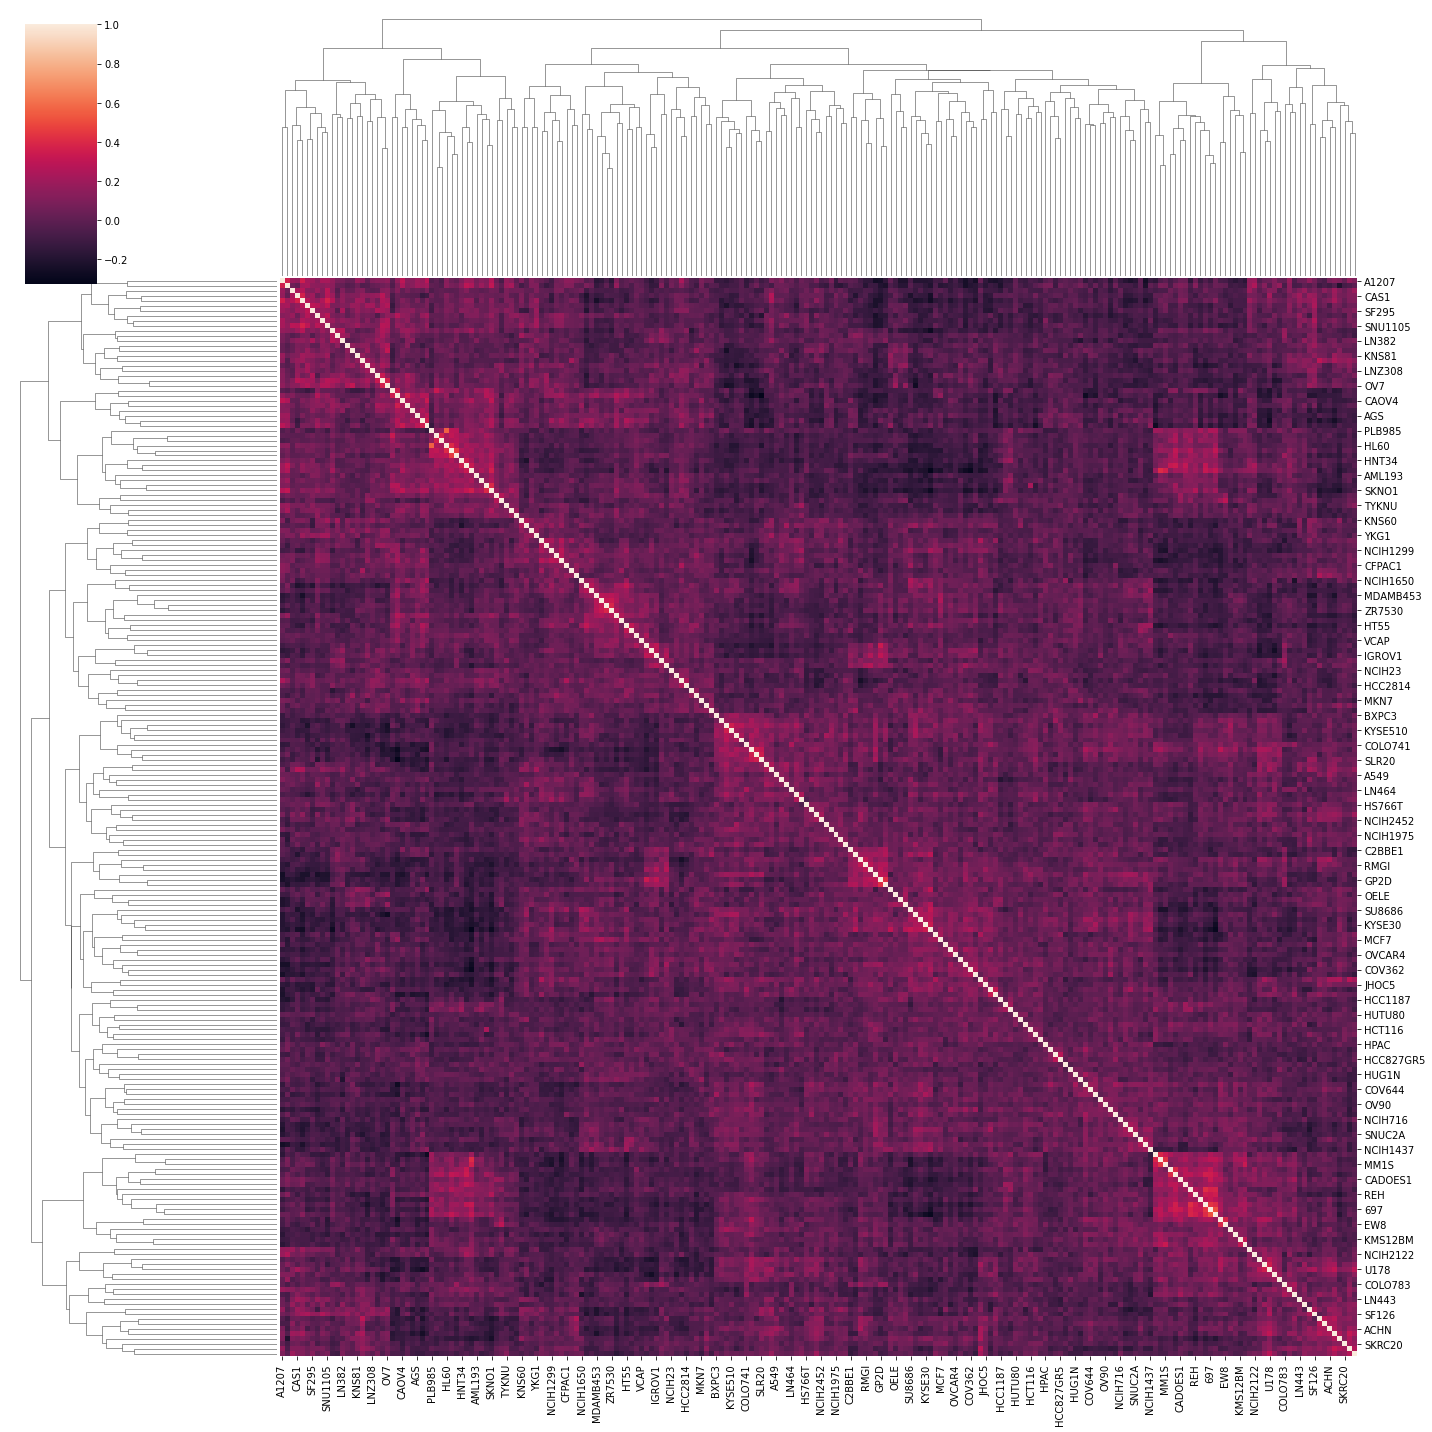

In [25]:
f = h5.File("attribute_similarity_matrix_cosine.h5", "r")

datasetNames = [n for n in f.keys()]

data = f['data']['matrix']

data_list = list()
for row in data:
    data_list.append(row)

data_array = np.array(data_list)
meta_colid = f['meta']['colid']

geneset_list = list()
for geneset in meta_colid:
    geneset_list.append(geneset.decode('UTF-8'))

df = pd.DataFrame(data_array, columns = geneset_list, index = geneset_list)

sns.clustermap(df, cmap="PiYG", figsize=(20,20))
plt.savefig("attribute_similarity.png")

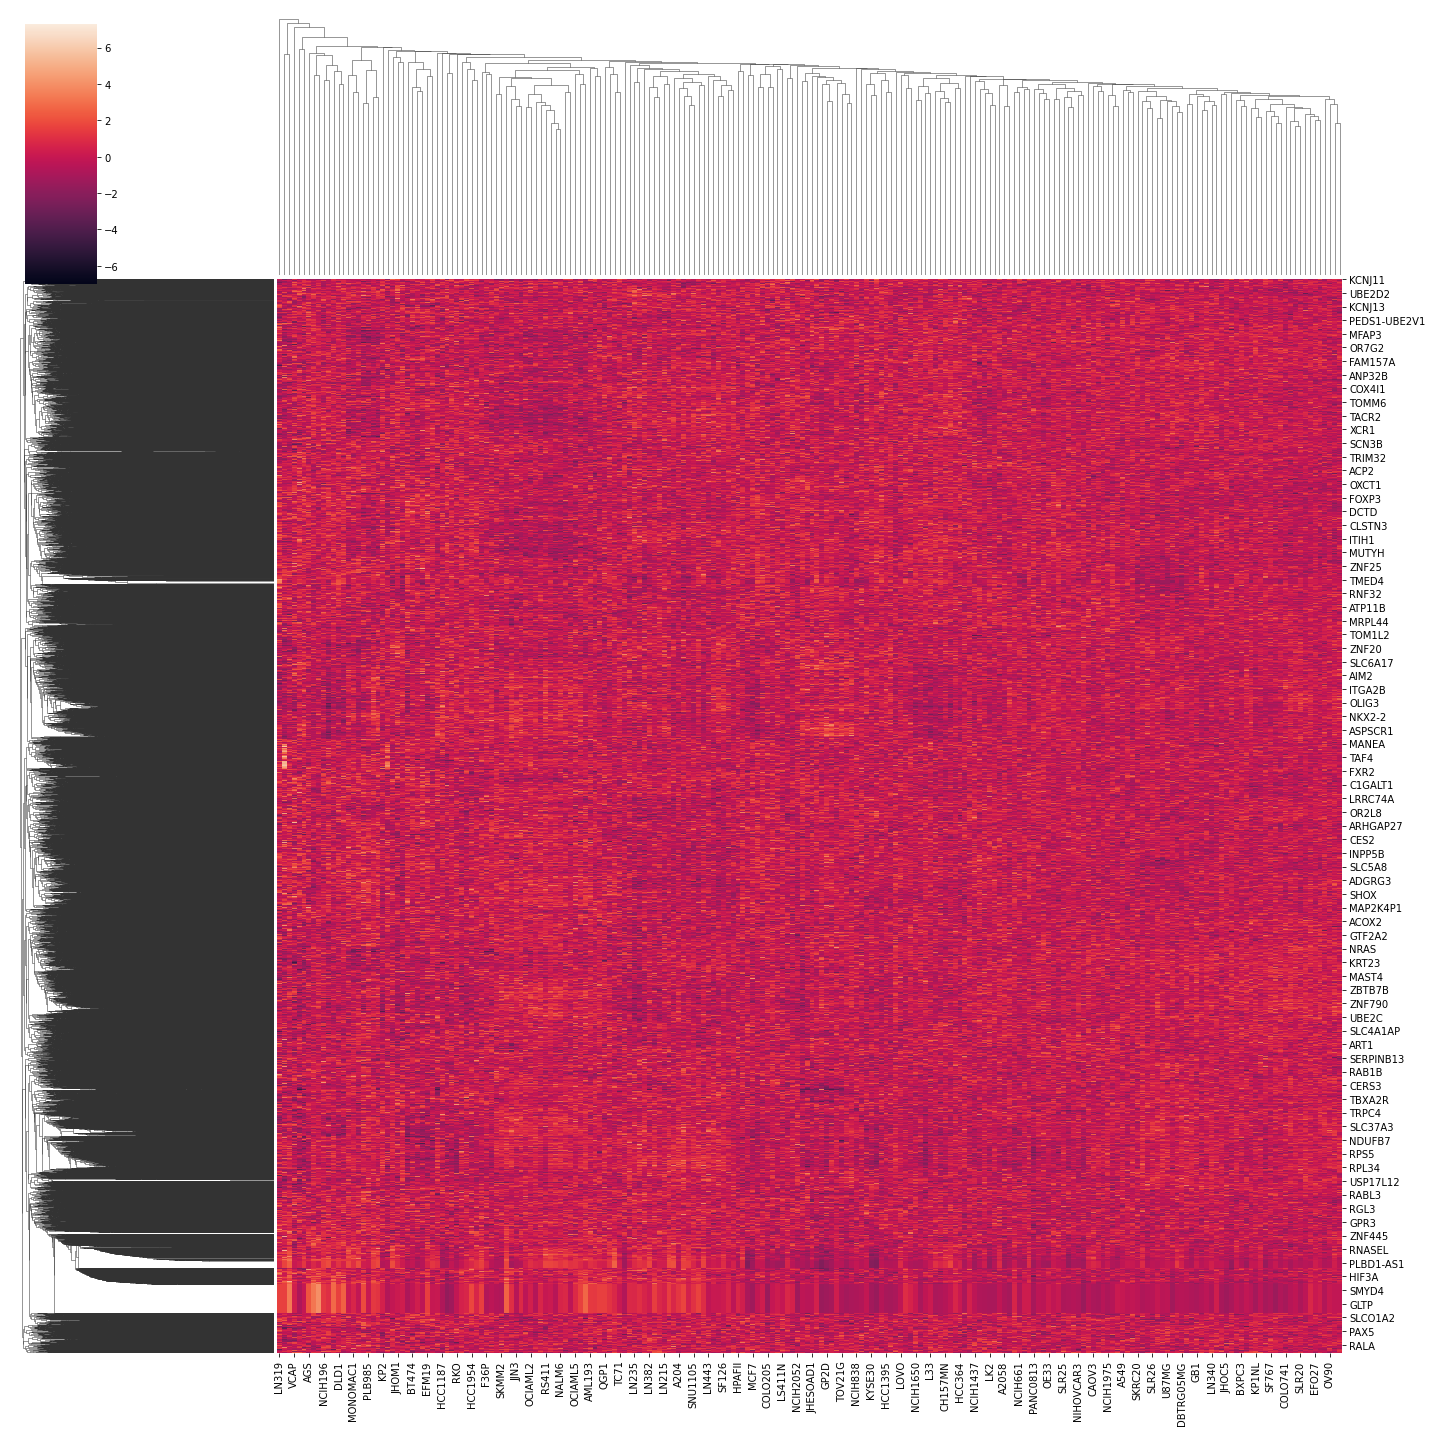

In [26]:
f = h5.File("gene_attribute_matrix_standardized.h5", "r")

datasetNames = [n for n in f.keys()]

data = f['data']['matrix']

data_list = list()
for row in data:
    data_list.append(row)

data_array = np.array(data_list)
meta_colid = f['meta']['colid']
meta_index = f['meta']['index']

geneset_list = list()
for geneset in meta_colid:
    geneset_list.append(geneset.decode('UTF-8'))
    
gene_list = list()
for gene in meta_index:
    gene_list.append(gene.decode('UTF-8'))

df = pd.DataFrame(data_array, columns = geneset_list, index = gene_list)

sns.clustermap(df, cmap="PiYG", figsize=(20,20))
plt.savefig("gene_attribute_similarity.png")